## The Ames dataset contains detailed information on home sales in Ames, Iowa, covering 2,930 residential properties sold between 2006 and 2010. There are 7 explandatory variables

In [2]:
#Import packages required for analysis and regresssion modelling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
#Import the data as a df using pandas
data = pd.read_csv('ames_housing.csv')
#Look at number of rows,columns
data.shape
#look at dtypes of the dataframe
data.info()
#Determine which columnms have missing values, sort high to low
missing_data_counts=data.isna().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
missing_data_counts

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

### PoolQC has the most missing values, followed by MiscFeature,Alley,Fence

In [5]:
# Iterate over each column in the dataframe, calculate the % of missing data each column is
for col in data.columns:
    missings = data[col].isna().sum()
    missing_proportions= (missings/len(data))*100
    #print(f"{col}:{missing_proportions:.2f}% of missing data")
    if missing_proportions > 10:
        if data[col].dtype != 'object':
            data[col].fillna(data[col].median(),inplace=True)
        else:
            data[col].fillna('Unknown',inplace=True)
    #Verifies no >10% missing rows remaining
    #print(missing_proportions)

/var/folders/jn/nqzjwr2d3wq38gk4prvw53j00000gn/T/ipykernel_2979/744399663.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(),inplace=True)
/var/folders/jn/nqzjwr2d3wq38gk4prvw53j00000gn/T/ipykernel_2979/744399663.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

### Columns containing >10% missing values have been filled with the median (if numeric data) or 'Unknown' (if categorical data)

In [6]:
#Remove duplicates, create a cleaned dataframe
cleaned_data = data.drop_duplicates()
dups_removed=data.shape[0] - cleaned_data.shape[0]
print(f"There were {dups_removed} duplicate rows removed")

There were 0 duplicate rows removed


In [7]:
# String formatting in categorical columns, first subset on those columns
cat_cols= cleaned_data.select_dtypes(include='object').columns
for col in cat_cols:
    cleaned_data[col]=cleaned_data[col].str.strip().str.lower()
#Then used Id column as df index

In [8]:
cleaned_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,rl,65.0,8450,pave,unknown,reg,lvl,allpub,...,0,unknown,unknown,unknown,0,2,2008,wd,normal,208500
1,2,20,rl,80.0,9600,pave,unknown,reg,lvl,allpub,...,0,unknown,unknown,unknown,0,5,2007,wd,normal,181500
2,3,60,rl,68.0,11250,pave,unknown,ir1,lvl,allpub,...,0,unknown,unknown,unknown,0,9,2008,wd,normal,223500
3,4,70,rl,60.0,9550,pave,unknown,ir1,lvl,allpub,...,0,unknown,unknown,unknown,0,2,2006,wd,abnorml,140000
4,5,60,rl,84.0,14260,pave,unknown,ir1,lvl,allpub,...,0,unknown,unknown,unknown,0,12,2008,wd,normal,250000
5,6,50,rl,85.0,14115,pave,unknown,ir1,lvl,allpub,...,0,unknown,mnprv,shed,700,10,2009,wd,normal,143000
6,7,20,rl,75.0,10084,pave,unknown,reg,lvl,allpub,...,0,unknown,unknown,unknown,0,8,2007,wd,normal,307000
7,8,60,rl,69.0,10382,pave,unknown,ir1,lvl,allpub,...,0,unknown,unknown,shed,350,11,2009,wd,normal,200000
8,9,50,rm,51.0,6120,pave,unknown,reg,lvl,allpub,...,0,unknown,unknown,unknown,0,4,2008,wd,abnorml,129900
9,10,190,rl,50.0,7420,pave,unknown,reg,lvl,allpub,...,0,unknown,unknown,unknown,0,1,2008,wd,normal,118000


In [9]:
# Feature engineering
cleaned_data['HouseAge'] = cleaned_data['YrSold'] - cleaned_data['YearBuilt']
cleaned_data['TotalBathrooms'] = cleaned_data['FullBath'] + (cleaned_data['HalfBath'] * 0.5) + cleaned_data['BsmtFullBath']  \
+ (cleaned_data['BsmtHalfBath'] * 0.5)
cleaned_data['TotalSquareFeet'] = cleaned_data['TotalBsmtSF'] + cleaned_data['GrLivArea']

In [10]:
cleaned_data['TotalBathrooms'] = (np.round(cleaned_data['TotalBathrooms'],decimals=0)).astype(int)

In [11]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   MSZoning         1460 non-null   object 
 3   LotFrontage      1460 non-null   float64
 4   LotArea          1460 non-null   int64  
 5   Street           1460 non-null   object 
 6   Alley            1460 non-null   object 
 7   LotShape         1460 non-null   object 
 8   LandContour      1460 non-null   object 
 9   Utilities        1460 non-null   object 
 10  LotConfig        1460 non-null   object 
 11  LandSlope        1460 non-null   object 
 12  Neighborhood     1460 non-null   object 
 13  Condition1       1460 non-null   object 
 14  Condition2       1460 non-null   object 
 15  BldgType         1460 non-null   object 
 16  HouseStyle       1460 non-null   object 
 17  OverallQual   

In [12]:
# Look at houses built after the year 1990
new_houses=cleaned_data[cleaned_data['YearBuilt'] > 1990]

In [13]:
expensive_new_houses=new_houses.sort_values(by='SalePrice',ascending=False).head(5)

In [14]:
# Lets look at grouping things based on new houses
avg_price_neighbourhood = new_houses.groupby('Neighborhood')['SalePrice'].mean()
median_price_style = new_houses.groupby('HouseStyle')['SalePrice'].median()
no_houses_type = new_houses.groupby('BldgType').size()
no_houses_type

BldgType
1fam      435
duplex      1
twnhs      20
twnhse     83
dtype: int64

In [15]:
#Practice a pivot table
p_table = pd.pivot_table(new_houses,columns='HouseStyle',index='Neighborhood',values='SalePrice',aggfunc='mean')
p_table

HouseStyle,1.5fin,1story,2story,sfoyer,slvl
Neighborhood,,,,,
blmngtn,NaN,194870.882353,NaN,NaN,NaN
clearcr,NaN,173000.000000,256000.000000,NaN,NaN
collgcr,NaN,198904.293333,224966.230769,148000.0,NaN
crawfor,NaN,300833.333333,NaN,NaN,NaN
edwards,NaN,189000.000000,148235.714286,169250.0,146500.000000
gilbert,NaN,219138.625000,194345.711864,NaN,173785.714286
mitchel,191343.0,168150.000000,215000.000000,206300.0,NaN
names,NaN,181000.000000,NaN,133000.0,NaN
noridge,347500.0,345066.666667,333740.875000,NaN,NaN


<Axes: >

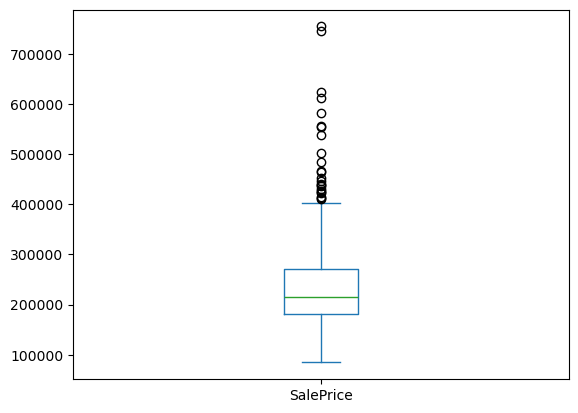

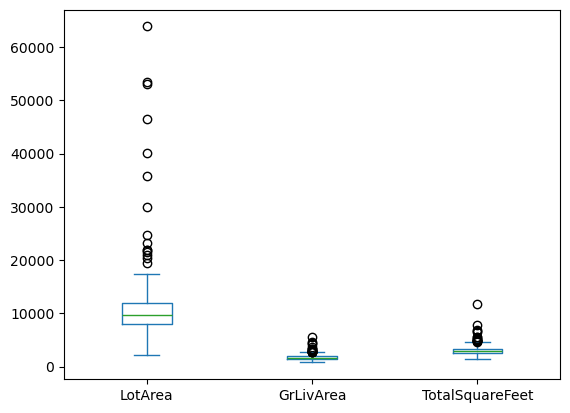

In [16]:
#now onto descriptive statistics, can use agg gfunction to do multiple
desc_stats=new_houses[['SalePrice','LotArea','GrLivArea','TotalSquareFeet']].agg(
    ['mean', 'std', 'var', 'median', 'min', 'max',
     lambda x: x.quantile(0.25),
     lambda x: x.quantile(0.75)]
)
# Rename lambda func ac
desc_stats.index=(['mean','std','var','median','min','max','Q1','Q3'])
#add iqr calculation as an index
desc_stats.loc['IQR'] = desc_stats.loc['Q3']- desc_stats.loc['Q1']
desc_stats
#Calculate bounds for outlier removal
lower_bounds = desc_stats.loc['Q1'] - 1.5 * desc_stats.loc['IQR']
upper_bounds = desc_stats.loc['Q3'] + 1.5 * desc_stats.loc['IQR']
#Generate 2 different plots because of sale price having larger y values
new_houses['SalePrice'].plot(kind='box')
new_houses[['LotArea','GrLivArea','TotalSquareFeet']].plot(kind='box')

#### Above boxplot shows that outliers exceed upper bounds of the IQR. Non are seemingly below

<Axes: >

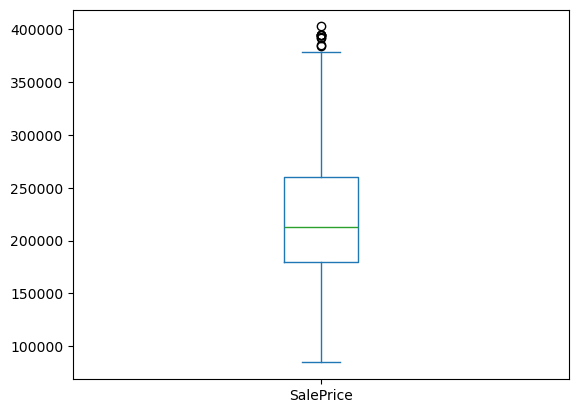

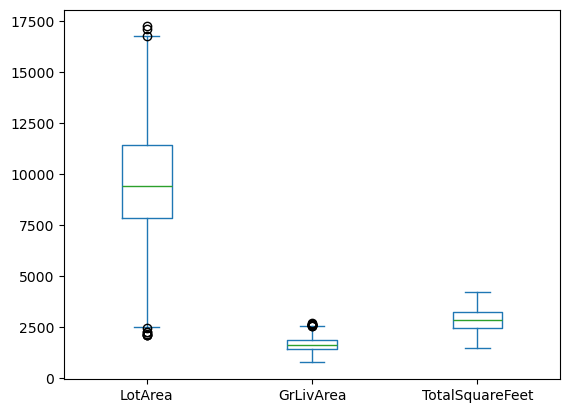

In [17]:
#Removal of outliers, first make copy of the cleaned dataset so that we don't modify the original data.
filtered = new_houses.copy()
for col in ['SalePrice','LotArea','GrLivArea','TotalSquareFeet']:
    lb= lower_bounds[col]
    ub= upper_bounds[col]
    filtered = filtered[(filtered[col] >= lb) & (filtered[col] <= ub)]

#Will confirm outlier removal by making more boxplots
#Generate 2 different plots because of sale price having larger y values
filtered['SalePrice'].plot(kind='box')
filtered[['LotArea','GrLivArea','TotalSquareFeet']].plot(kind='box')


### Part 2: statistical analysis

,SalePrice
SalePrice,1.000000
TotalSquareFeet,0.836044
OverallQual,0.752969
GrLivArea,0.681207
GarageArea,0.669362


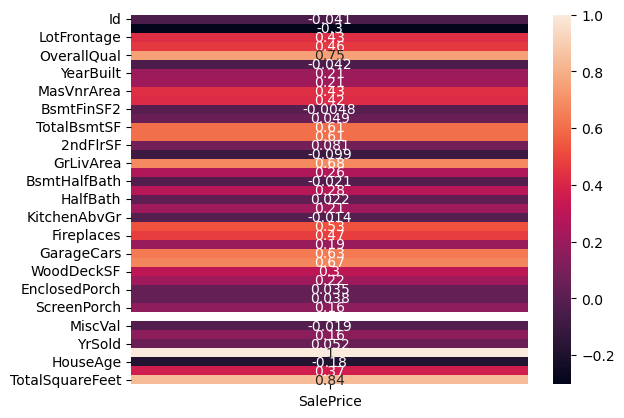

In [18]:
#Correlation analysis
saleprice_corr = filtered.corr(numeric_only=True)[['SalePrice']]
sns.heatmap(saleprice_corr,annot=True)
saleprice_corr.sort_values(by='SalePrice',ascending=False).head(5)


## Total square feet has the strongest correlation,followed by overall quality. Bigger houses = bigger sales price.

<Axes: xlabel='TotalSquareFeet', ylabel='SalePrice'>

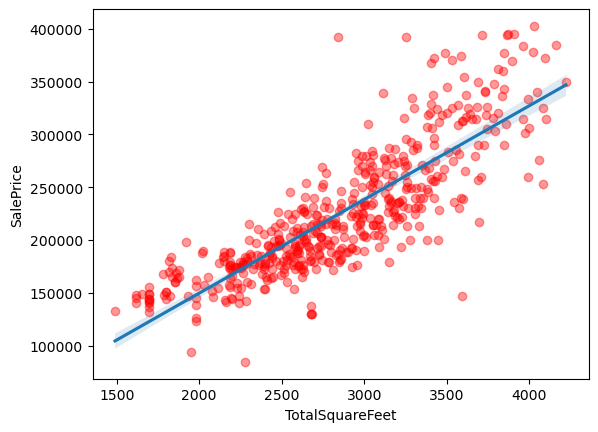

In [19]:
sns.regplot(
    data=filtered,
    x='TotalSquareFeet',
    y='SalePrice',
    scatter_kws={'alpha':0.4,
                'color':'red'}
)


### Shows a strong linear correlation, however there is more variability at larger house sizes and some extreme values at the lower and larger house sizes.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

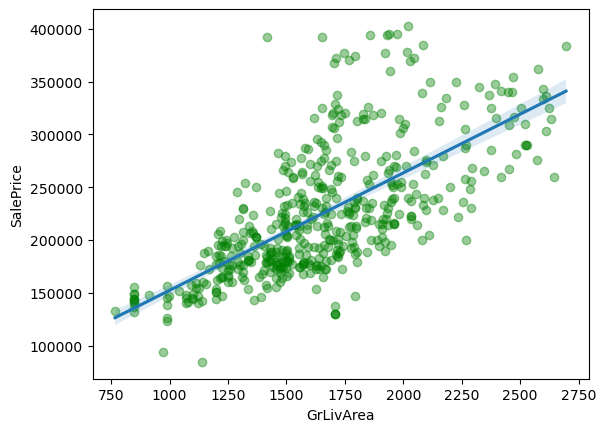

In [20]:
sns.regplot(
    data=filtered,
    x='GrLivArea',
    y='SalePrice',
    scatter_kws={'alpha':0.4,
                'color':'green'}
)

In [21]:
#checking what quality ratings are possible
filtered['OverallQual'].unique()

array([ 7,  8,  5,  9,  6,  4, 10])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

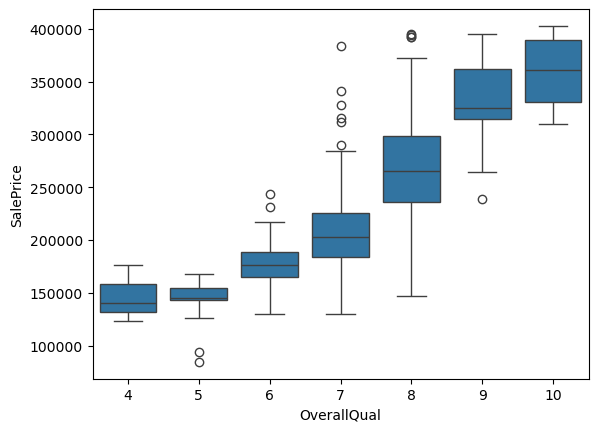

In [22]:
#boxplot of quality vs price
sns.boxplot(
    data=filtered,
    x='OverallQual',
    y='SalePrice'
)

#### A Boxplot was used to see how the median saleprice changed when Overall quality increased, which is an ordinal variable. It appears, as one may expect, sale price increases as overall quality increases.

<Axes: xlabel='TotalSquareFeet', ylabel='SalePrice'>

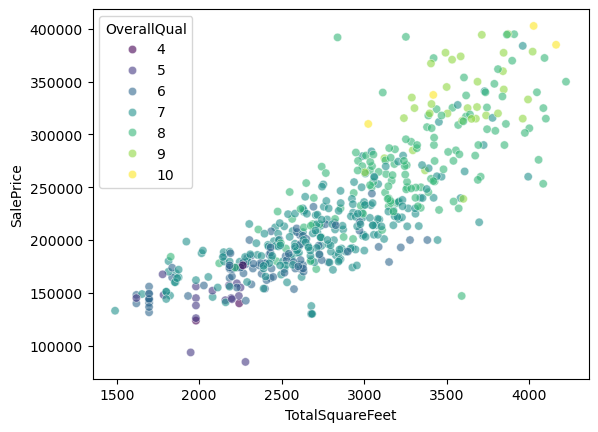

In [23]:
sns.scatterplot(
    data=filtered,
    x='TotalSquareFeet',
    y='SalePrice',
    hue='OverallQual',
    alpha=0.6,
    palette='viridis'
)

### Here we can see the majority of high sale price houses are associated with the top levels of quality (> 6 )

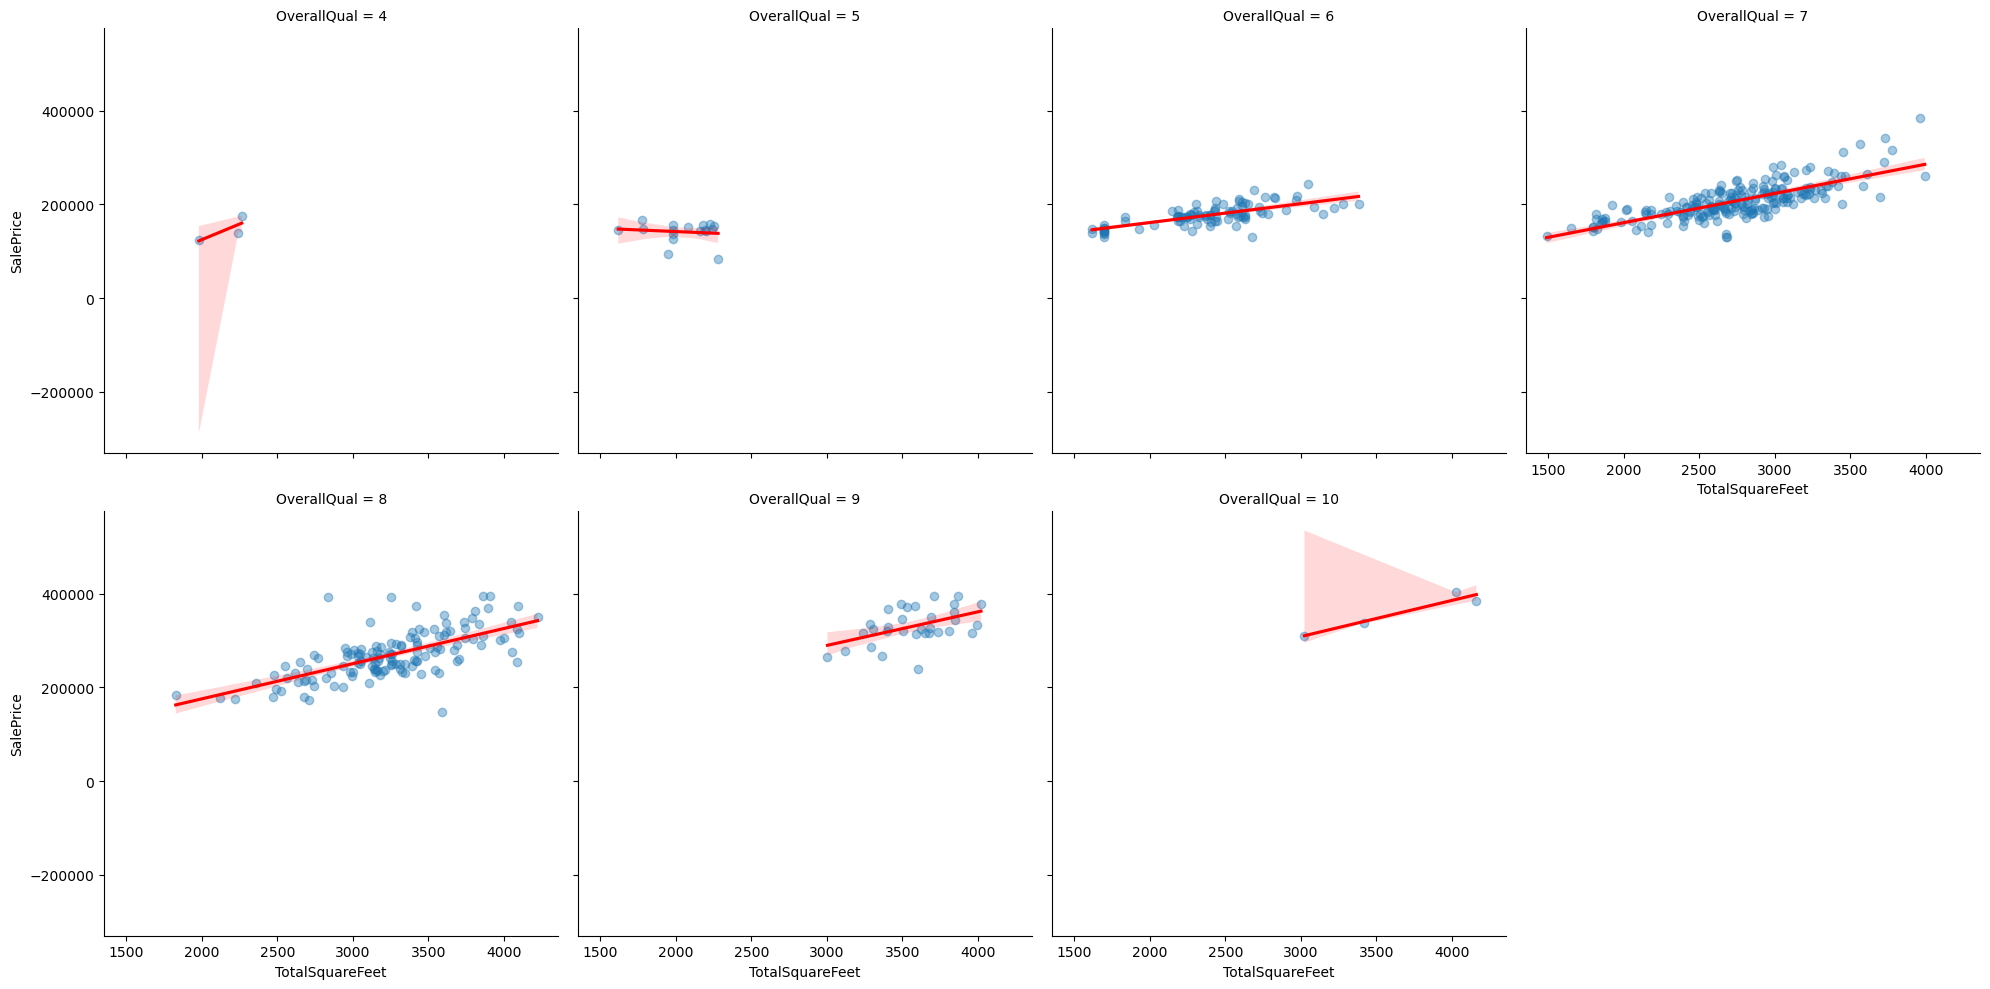

In [24]:
sns.lmplot(
    data=filtered,
    x='TotalSquareFeet',
    y='SalePrice',
    col='OverallQual',
    col_wrap=4,
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'}
)

In [25]:
filtered['OverallQual'].value_counts().sort_index()

OverallQual
4       3
5      17
6      94
7     214
8     136
9      32
10      4
Name: count, dtype: int64

## Faceting the quality scores highlights that the extreme scores have limited data

In [26]:
#Regression analysis
X = filtered[['TotalSquareFeet']]
y= filtered['SalePrice']

In [27]:
X_const=sm.add_constant(X)
model_1 = sm.OLS(y,X_const).fit()

In [28]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1156.
Date:                Tue, 20 Jan 2026   Prob (F-statistic):          6.37e-132
Time:                        11:54:37   Log-Likelihood:                -5918.9
No. Observations:                 500   AIC:                         1.184e+04
Df Residuals:                     498   BIC:                         1.185e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.789e+04   7586.065     

### A simple linear regression confirms our hypothesis that Total Square Feet is strongly associated with Saleprice. Around 69% of the variance in Saleprice is explained by TotalSquareFeet (R squared). The Total sqaure foot coef suggests that an increase of 1 square foot leads to an increase of sale price byh £89

In [29]:
#Use multiple regression to see how size affects sale price, whilst taking into account quality
X = filtered[['TotalSquareFeet','OverallQual']]
y = filtered['SalePrice']
X_const = sm.add_constant(X)
model_2=sm.OLS(y,X_const).fit()
print(model_2.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     817.8
Date:                Tue, 20 Jan 2026   Prob (F-statistic):          6.41e-158
Time:                        12:13:57   Log-Likelihood:                -5854.9
No. Observations:                 500   AIC:                         1.172e+04
Df Residuals:                     497   BIC:                         1.173e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.135e+05   9756.689    -

### Including OverallQuality increased the explanatory power of the model, suggesting both variables are independently associated with saleprice

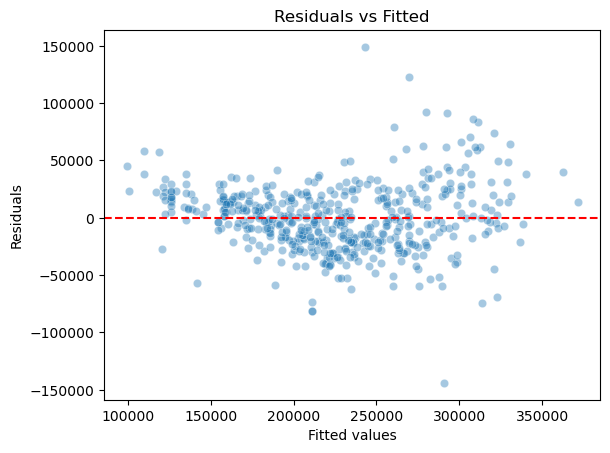

count    5.000000e+02
mean    -2.980232e-11
std      2.948992e+04
min     -1.439878e+05
25%     -1.949556e+04
50%     -8.593388e+02
75%      1.754970e+04
max      1.490505e+05
dtype: float64

In [36]:
#Looking at diagnostic plots of the model, first get the residuals of the model and the fitted values
fitted = model_2.fittedvalues
residuals = model_2.resid
sns.scatterplot(x=fitted,y=residuals,alpha=0.4)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()
residuals.describe()

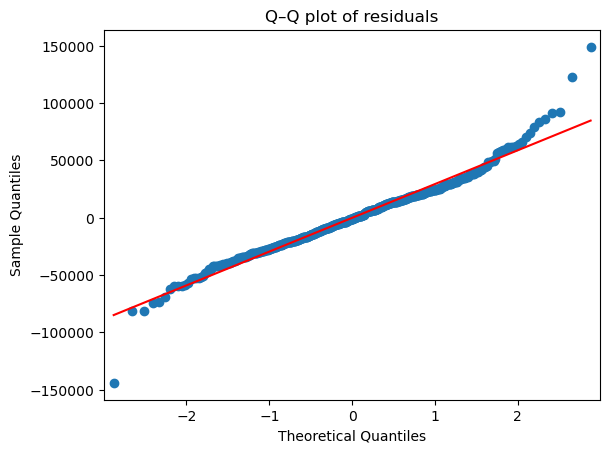

In [40]:
#QQ plot, to check residuals
sm.qqplot(model_2.resid, line='s')
plt.title("Q–Q plot of residuals")
plt.show()
#Remember, the scales need to be standardised for an accurate plot!

#### The Q–Q plot of raw residuals initially appeared compressed due to scale differences between the residuals and the standard normal distribution. After standardising residuals, the Q–Q plot showed moderate deviations from normality at the tails, which is common in housing price data. However, at high prices, the points fan out from the line. A log transform may draw high prices in.

In [41]:
#Log transform of saleprice
filtered['log_SalePrice'] = np.log(filtered['SalePrice'])

In [43]:
X_log=filtered[['TotalSquareFeet','OverallQual']]
y_log=filtered['log_SalePrice']
X_const=sm.add_constant(X_log)

model_log=sm.OLS(y_log,X_const).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     931.3
Date:                Tue, 20 Jan 2026   Prob (F-statistic):          7.77e-169
Time:                        13:51:41   Log-Likelihood:                 348.25
No. Observations:                 500   AIC:                            -690.5
Df Residuals:                     497   BIC:                            -677.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.8121      0.040    2

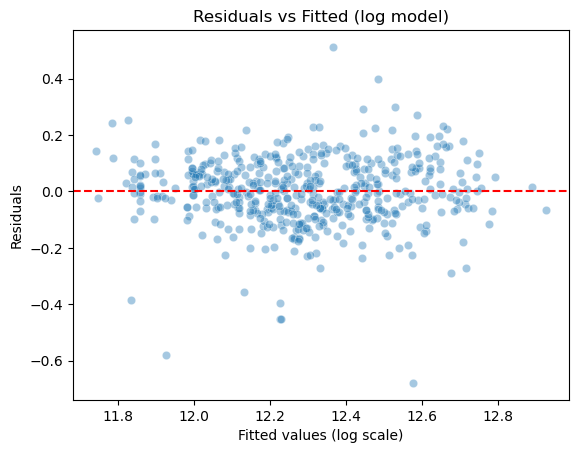

In [44]:
fitted_log = model_log.fittedvalues
resid_log = model_log.resid
sns.scatterplot(x=fitted_log, y=resid_log, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values (log scale)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (log model)")
plt.show()

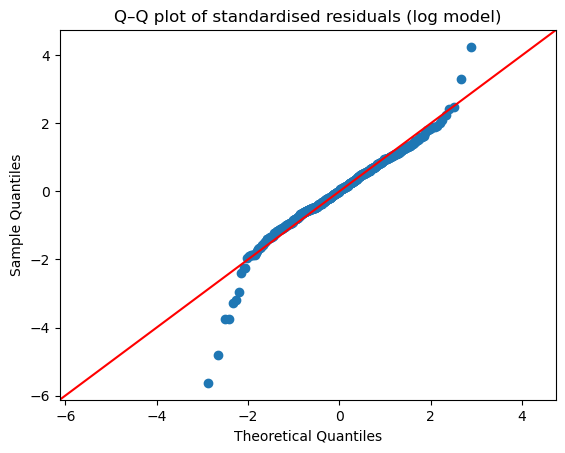

In [45]:
std_resid_log = (resid_log - resid_log.mean()) / resid_log.std()

sm.qqplot(std_resid_log, line='45')
plt.title("Q–Q plot of standardised residuals (log model)")
plt.show()

## Key Findings

- TotalSquareFeet is the strongest single predictor of SalePrice.
- OverallQual adds significant explanatory power beyond size alone.
- A log-transformed model improved residual behaviour and interpretability.
- Results align with exploratory visualisations and domain expectations.
